In [269]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [270]:
#API url and authentication key
api_url = "https://api.football-data.org/v4/competitions/PL/standings"
url_scorers = "https://api.football-data.org/v4/competitions/PL/scorers"
headers = {"X-Auth-Token": "f27778fe0b5d451cbfe654ba74ede45f"}



In [271]:
#Harvest data from the api
def pl_data(api_url, headers):

    response=requests.get(api_url,headers = headers)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error: {response.status_code}")
        return None


In [272]:
#call the function and store the data 
data=pl_data(api_url,headers)

Since the above data is a dictionary we can extract useful data such as premier league table
To do so, we extract the table in the below cell

In [273]:
#get the value of the key "standings" and return as a list
standings = data.get("standings", [])[0]["table"]
table_data = []
#loop through the list and append the following data to the above empty list
for team in standings:
    table_data.append([
        team["position"], 
        team["team"]["name"],
        team["points"],
        team["playedGames"],
        team["won"],
        team["draw"],
        team["lost"],    
        team["goalDifference"],
    ])

# Creating a DataFrame for the standing
df = pd.DataFrame(table_data, columns=["pos", "Team", "PTS", "MP", "W", "D", "L", "GD"])
df


,pos,Team,PTS,MP,W,D,L,GD
0,1,Liverpool FC,70,29,21,7,1,42
1,2,Arsenal FC,58,29,16,10,3,29
2,3,Nottingham Forest FC,54,29,16,6,7,14
3,4,Chelsea FC,49,29,14,7,8,16
4,5,Manchester City FC,48,29,14,6,9,15
5,6,Newcastle United FC,47,28,14,5,9,9
6,7,Brighton & Hove Albion FC,47,29,12,11,6,6
7,8,Fulham FC,45,29,12,9,8,5
8,9,Aston Villa FC,45,29,12,9,8,-4
9,10,AFC Bournemouth,44,29,12,8,9,12


Data visualization

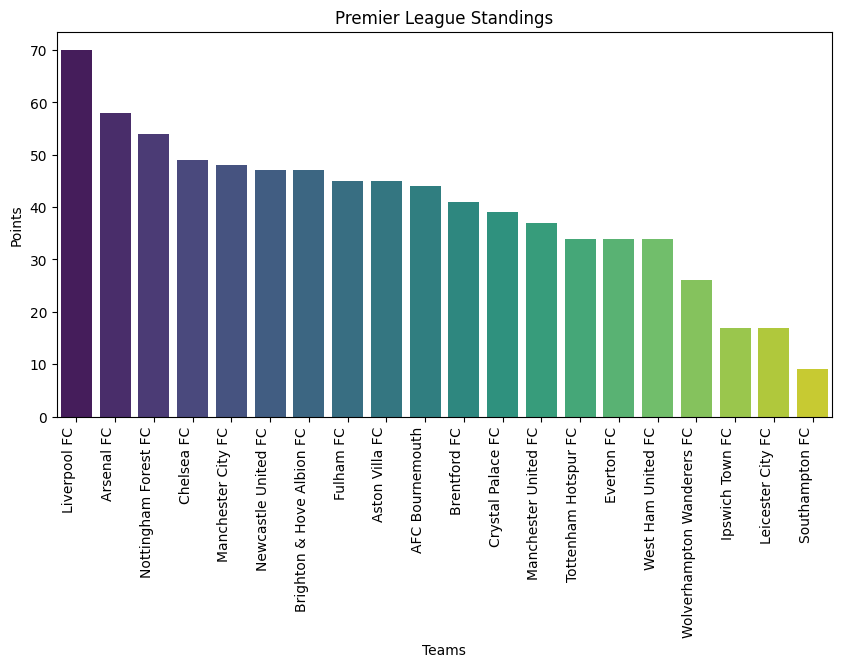

In [274]:
# A bar chart for teams comparison
plt.figure(figsize=(10, 5))
sns.barplot(x="Team", y="PTS",hue="Team", data=df, palette="viridis")
plt.xticks(rotation=90, ha="right")
plt.xlabel("Teams")
plt.ylabel("Points")
plt.title("Premier League Standings")
plt.show()

A pie chart that has the wins, draws and losses for manchester united fc

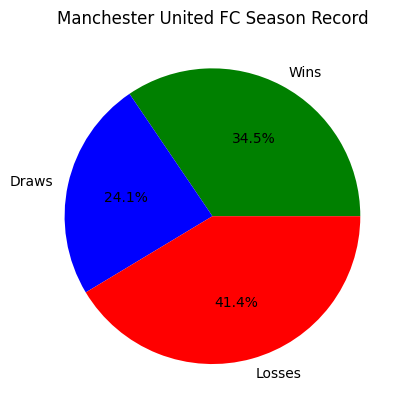

In [275]:
team_name = "Manchester United FC"
team_data = df[df["Team"] == team_name].iloc[0]  # Find team row
labels = ["Wins", "Draws", "Losses"]
values = [team_data["W"], team_data["D"], team_data["L"]]

#pass the values and labels to pie function  from matplotlib
plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["green", "blue", "red"])
plt.title(f"{team_name} Season Record")
plt.show()

Scatter plot that compare goals scored and goa;s conceded

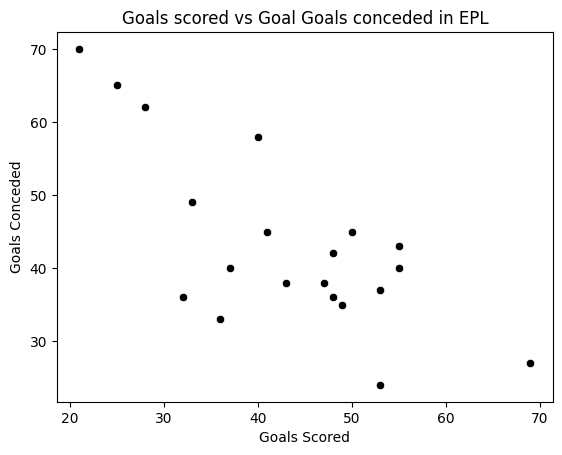

In [276]:
#Extract goals scored and goals conceded and store in data frame
df_goals = pd.DataFrame([{
    "Team": team["team"]["name"],
    "Goals Scored": team["goalsFor"],
    "Goals Conceded": team["goalsAgainst"]
} for team in standings])

sns.scatterplot( data = df_goals, x = "Goals Scored", y = "Goals Conceded", color = "black")

plt.title("Goals scored vs Goal Goals conceded in EPL")
plt.show()


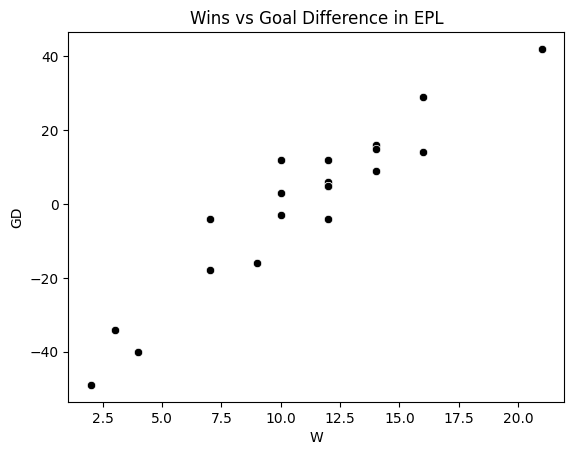

In [277]:
sns.scatterplot( data = df, x = "W", y = "GD", color = "black")

plt.title("Wins vs Goal Difference in EPL")
plt.show()

Top 10 goal scorers in English Premier League

In [278]:
standings = data.get("standings", [])[0]["table"]

top_scorers = pl_data(url_scorers, headers)
top_scorers = top_scorers.get("scorers",[])
epl_top_scores = pd.DataFrame([{
    "Player" : scorers["player"]["name"],
    "Team" : scorers["team"]["name"],
    "Matches Played" : scorers["playedMatches"],
    "Goals" : scorers["goals"],
    "Assists" : scorers["assists"],
    "penalties" : scorers["penalties"],

} for scorers in top_scorers])
epl_top_scores


,Player,Team,Matches Played,Goals,Assists,penalties
0,Mohamed Salah,Liverpool FC,29,27,16,9.0
1,Erling Haaland,Manchester City FC,28,21,3,2.0
2,Alexander Isak,Newcastle United FC,25,19,5,2.0
3,Chris Wood,Nottingham Forest FC,29,18,3,3.0
4,Bryan Mbeumo,Brentford FC,29,15,5,4.0
5,Cole Palmer,Chelsea FC,28,14,6,3.0
6,Yoane Wissa,Brentford FC,26,13,2,NaN
7,Matheus Cunha,Wolverhampton Wanderers FC,26,13,5,NaN
8,Ollie Watkins,Aston Villa FC,29,13,5,2.0
9,Jean-Philippe Mateta,Crystal Palace FC,27,12,2,2.0
